<a href="https://colab.research.google.com/github/easyhardhoon/machine_learning/blob/master/ML11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#신경망 학습의 목적

손실 함수의 값을 가능한 한 낮추는 매개변수를 찾는 것

--> 매개변수의 최적값을 찾는 문제이며, 이러한 문제를 푸는 것을 최적화라고 부른다

--> 지금까지 우리는 이러한 최적의 매개변수 값을 찾는 단서로 매개변수의 기울기(미분)을 사용했었다. 매개변수의 기울기를 구해 기울어진 방향으로 몇번이고 매개변수 값을 갱신하는 일의 반복이었다. 이를 **확률적 경사 하강법(SGD)**라고 함.

--> SGD는 단순하지만, 문제에 따라서는 SGD보다 똑똑한 방법이 있다.

In [ ]:
#SGD : 기울어진 방향으로 일정 거리만 가겠다
class SGD:
  def __init__(self,lr=0.01):
    self.lr = lr #lr : learning rate. 학습률
  #항상 그래왔듯 params, grads 는 각각의 가중치 매개변수와 가중치 매개변수의 기울기의 값을 저장하는 딕셔너리 변수임.
  def update(self,params,grads):
    for key in params.keys():
      params[key] -= self.lr * grads[key]

#SGD 

일종의 매개변수 갱신을 책임지는 optimizer(최적화를  행하는 자)이다.

큰 그림에서, 수도 코드를 참조하면, 일단 역전파를 통해 각 매개변수의 기울기를 구하는것 까지는 동일하고, 그 기울기를 통해 **매개변수를 갱신하는 방법 중에 하나**가 지금까지 소개한 **SGD**(기울어진 방향으로 일정 거리만 가겠다)이다

#모든 것은 모듈화

이렇게 최적화를 담당하는 클래스를 분리해 구현하면 기능을 모듈화하기 편하다
(앞서 노드 계층들을 모듈화한것 처럼).

다른 최적화 기법을 사용한다면, optimizer 변수를 바꿔주기만 하면 끝이다.

ex) optimizer= SGD() ----------> optimizer = Momentum()

이게 전체 코드의 흐름이며 실제 딥러닝 프레임워크에서 사용하는 방법이다

#SGD의 단점

ex) f(x,y) = 1/20 x**2 + y**2 **(비등방성 함수. 방향에 따라 성질(기울기)가 달라지는 함수)**

--> 여기서는 최솟값까지 지그재그로 이동하니 상당히 비효율적임

--> 이럴때는 SGD같이 무작정 기울어진 방향으로 진행하는 단순한 방식보다 더 영리한 묘안이 필요. 

또한 이 함수에서는 기울어진 방향이 본래의 최솟값과 다른 방향을 가리키고  있기도 했다. 수시로 함수의 방향이 달라지니 무작정 기울어진 방향으로 진행하니 지그재그로  삥 돌아가는 효과가 나타난것이다

✈이제 이러한 SGD의 단점을 개선시켜주는 3가지 방법을 소개한다

#1. 모멘텀

운동량. 물리와 관계가 있다. 기울기 방향으로 물체가 가속된다.


In [ ]:
class Momentum:
  def __init__(self,lr=0.01,momentum=0.9):
    self.lr = lr
    self.momentum = momentum
    self.v = None
  def update(self,params,grads):
    if self.v is None:
      self.v = {}
      for key,val in params.items():
        self.v[key] = np.zeros_like(val) #v는 속도의 개념입니다. 매개변수와 같은 구조의 데이터를 딕셔너리 변수로 저장합니다.
    for key in params.keys():
      self.v[key] = self.momentum*self.v[key] - self.lr*grads[key] # 각 v에 일련의 계산을 수행합니다. 점점 속도가 갱신되는 모습
      params[key] += self.v[key] # 이 속도를 기반 매개변수 갱신.
        #아무튼간에 param(매개변수)를 갱신하는 방법 중에 하나입니다. 즉 parms의 갱신이 주목적입니다.
  

#위 코드를 이용하면

앞선 문제에서 지그재그로 돌아가는 효과가 없어지고 공이 그릇 바닥을 구르듯 움직인다. SGD보다 x축 방향으로 빠르게 다가가 지그재그 움직임이 줄어든다

#2. AdaGrad

학습률 감소. 학습을 진행하면서 학습률을 점차 줄여가는 방법.

AdaGrad는 각각의 매개변수에 맞춤형 값을 만들어준다.

매개변수의 원소 중에서 많이 움직인 원소는 학습률을 낮아지게 만든다

또한 과거의 기울기를 제곱하여 계속 더해가므로 학습이 진행될수록 갱신 강도가 약해진다.

✈참고로, 이렇게 계속 학습하면 갱신량이 0이 되는 순간이 오게 되어 전혀 갱신되지 않는 일이 벌어진다. 이러한 문제를 개선한 기법으로 RMSProp가 있다. 이는 과거의 모든 기울기를 균일하게 더해가는 것이 아니라 먼 과거의 기울기는 서서히 잊고 새로운 기울기 정보를 크게 반영한다. 이를  지수이동평균이라 한다. 

In [ ]:
class AdaGrad:
  def __init__(self,lr=0.01):
    self.lr = lr
    self.h = None
  def update(self,params,grads):
    if self.h is None:
      self.h = {}
      for key, val in params.items():
        self.h[key] = np.zeros_like(val) #위의 모멘텀때와 구조가 같습니다.
    for key in params.keys():
      self.h[key] += grads[key] * grads[key] #마찬가지로 h 딕셔너리의 value값을 정해주는 작업입니다.
      params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) +  1e-7) #h[key]에 담겨있는 값이 0이라도 계산이 실행될 수 있도록 아주 작은 값 배치.
      #                                   <- 요까지는 일반 SGD의 방법이었씁니다. AdaGrad는 학습률 값을 바꿔주기 때문에 뒤의 식이 더 붙은 것입니다.
    

#위 코드를 이용하면

만약 큰 폭으로 움직였다면 이 큰 움직임에 비례해 학습률을 낮춰주기 때문에(갱신 정도를 낮춰주기 떄문에), 이러한 흐름대로 하면 지그재그 움직임이 현저히 줄어들고 매우 효율적으로 움직이는 것을 볼 수 있습니다,

#3. Adam

모멘텀 + AdaGrad의 융합이라고 생각.

두 방법의 이점을 조합. 매개변수 공간을 가장 효율적으로 탐색해줄 수 있다. 

++ 하이퍼 파라미터(ex. 학습률. 즉 사람의 힘으로 정의해야 하는 값)의 편향 보정. 여기서는 하이퍼 파라미터로 3개를 사용

(코드 생략)

실제로 위의 예시에 적용해보면 공이 구르듯 움직임과 동시에 학습의 갱신 강도가 다르게 적용되어 가장 효율적으로 최솟값에 근접하는 것을 볼 수 있다.

#어느 갱신 방법을 이용할 것인가?

지금까지의 4가지 방법에 대한 결과 그래프입니다.

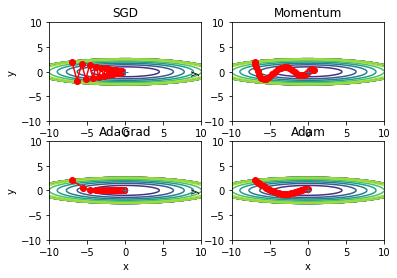

In [ ]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from optimizer import *


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # 외곽선 단순화
    mask = Z > 7
    Z[mask] = 0
    
    # 그래프 그리기
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

위 그림에서만 보면 AdaGrad가 가장 좋아보이지만 이 결과는 풀어야할 문제가 무엇이냐에 따라 달라지므로 주의해야 한다

또한 학습률 등의 하이퍼 파라미터들을 어떻게 설정하느냐에 따라서도 달라지므로 주의해야한다

현재 많은 연구에서 SGD를 사용한다. 최근에는 Adam도 많이 쓰는 추세이다.

모멘텀과 AdaGrad도 각각의 장단점이 있다.

아직 모든 문제에서 항상 뛰어난 기법은 없으며 위 4가지 방법중 가장 잘 맞는게 케바케로 사용되는 모습이다.

#정리 - 학습진도의 측면

일반적으로 SGD보다 다른 세 기법이 빠르게 학습하고 때로는 최종 정확도도 높다

가장 주의해야할점은 하이퍼파라미터인 **학습률의 값과 신경망의 구조(층 깊이)에 따라 결과가 달라진다는 점이다.**

#가중치의 초깃값에 관하여

신경망 학습에서 특히 중요한게 가중치의 초깃값이다. 가중치의 초깃값을 무엇으로 설정하느냐에 따라 신경망 학습의 성패가 갈린다. 

가중치 매개변수의 값이 작아지도록 학습하면, 오버피팅이 잘 일어나지 않는다.

그러려먼 초깃값도 최대한 작은 값에서 시작하는게 옳다. 

참고로, 가중치의 초깃값을 모두 0으로(0이 아니더라도 모두같게) 세팅하면, 학습이 올바르게 되지 않는다. 입력층의 가중치가 모두 같으면, 역전파일때 층마다의 가중치가 똑같이 갱신되기 떄문이다. (곱셈 노드를  생각해보자)

이러면 가중치들은 같은 초기값에서 시작하고 갱신을 거쳐도 여전히 서로 같은 값을 유지한다. 이러면 가중치를 여러개 갖는 의미를 사라지게 한다.

그래서 지금까지 가중치를 초기에 설정할때 0.01 np.**random**.randn(10,100)을 한것이다.

#1. 가중치의 표준편차를 1로 설정했을때

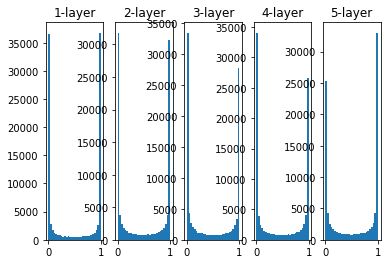

In [5]:
#가중치의 초깃값에 따라 은닉층 활성화값(활성화 함수의 출력값)들이 어떻게 변화하는지 실험하는 코드입니다.
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1 / (1+np.exp(-x))
x = np.random.randn(1000,100) #randn(a,b)는, 행렬 a*b 임을 의미합니다. 즉 1000개의 데이터를 의미합니다. 표준편차가 1인 정규분포를 이용하였씁니다.
node_num = 100 # 각 은닉층의 뉴런수를 의미합니다
hidden_layer_size = 5
activations = {}
for i in range(hidden_layer_size):
  if i!= 0:
    x = activations[i-1]
  w = np.random.randn(node_num, node_num) * 1
  a = np.dot(x,w)
  z = sigmoid(a)
  activations[i] = z #각각의 활성화 결과를 저장합니다.

for i,a in activations.items():
  plt.subplot(1,len(activations), i+1)
  plt.title(str(i+1) + "-layer")
  plt.hist(a.flatten(), 30, range = (0,1))
plt.show()


#그래프에 대한 해석

각 층의 활성화 값들이 0과 1에 치우쳐져 있는것을 볼 수 있다.

sigmoid함수는 출력(결과값)이 0 또는 1에 가까워지면 그 미분은 0에 다가간다. 

이는 sigmoid함수의 모양을 보면 알 수 있다. 교재 73p참고. 

그래서 데이터가 이렇게 0과 1에 치우치면 역전파의 기울기 값이 점점 작아지다가 소멸된다. 

이것을 **기울기 손실**이라고 하고, 이러한 점은 딥러닝에서 큰 문제를 일으킬 수 있다.

#2. 가중치의 표준편차를 0.01로 설정했을때

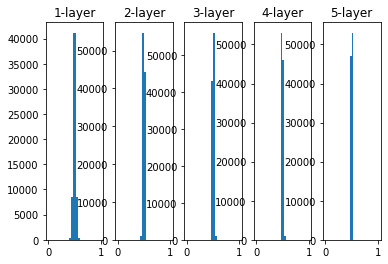

In [6]:
#가중치의 초깃값에 따라 은닉층 활성화값(활성화 함수의 출력값)들이 어떻게 변화하는지 실험하는 코드입니다.
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1 / (1+np.exp(-x))
x = np.random.randn(1000,100) 
node_num = 100 
hidden_layer_size = 5
activations = {}
for i in range(hidden_layer_size):
  if i!= 0:
    x = activations[i-1]
  w = np.random.randn(node_num, node_num) * 0.01 #여기가 바뀐 부분입니다.
  a = np.dot(x,w)
  z = sigmoid(a)
  activations[i] = z 
for i,a in activations.items():
  plt.subplot(1,len(activations), i+1)
  plt.title(str(i+1) + "-layer")
  plt.hist(a.flatten(), 30, range = (0,1))
plt.show()


#그래프에 대한 해석

이번에는 양극단(0,1)로 쏠리진 않았지만, 0.5 근방으로 집중되었다.

이렇게 활성화값이 치우치면 표현력 관점에서는 큰 문제다.

즉 다수의 뉴런이 거의 같은 값을 출력하고 있으니 뉴런을 여러개 둔 의미가 없다. 그냥 한개만 둔 것이랑 다른게 없다. (앞의 논리와 일치)

이러한 관점에서 **활성화값이 치우치면 표현력을 제한한다는 점에서 문제가 된다**

#그래서

등장한 것이 Xavier 초깃값이다. 현재 Xavier 초깃값은 일반적인 딥러닝 프레임워크들이 표준적으로 이용하고 있다.

ex) caffe, tensorflow, pytorch

간단히 말해 앞 계층의 노드가 n개라면 표준편차가 1/sqrt(n) 인 분포를 사용하면 된다.

이 값을 쓰면 앞 층의 노드가 많을수록 편차가 작아지니 대상 노드의 초깃값으로 설정하는 가중치가 좁게 퍼진다. 

아래 코드에서는 모든 층의 노드가 100개라고 단순화하였다.


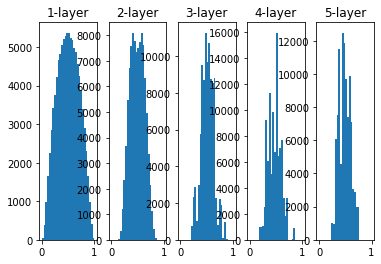

In [7]:

import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1 / (1+np.exp(-x))
x = np.random.randn(1000,100) 
node_num = 100 
hidden_layer_size = 5
activations = {}
for i in range(hidden_layer_size):
  if i!= 0:
    x = activations[i-1]
  w = np.random.randn(node_num, node_num) / np.sqrt(node_num) #여기가 바뀐 부분입니다. / 뒤에 값이 표준편차라고 생각합시다.
  # 예를 들어 0.5이면 __ / 0.5
  a = np.dot(x,w)
  z = sigmoid(a)
  activations[i] = z 
for i,a in activations.items():
  plt.subplot(1,len(activations), i+1)
  plt.title(str(i+1) + "-layer")
  plt.hist(a.flatten(), 30, range = (0,1))
plt.show()


# 그래프에 대한 해석

확실히 앞 두 경우보다 넓게 분포됨을 알 수 있다. 각 층에 흐르는 데이터는 적당히 퍼져 있으므로, 시그모이드 함수의 표현력도 제한받지 않고 학습이 효율적으로 이루어 질 것이라고  예상할 수 있다.

+ 활성화함수로 sigmoid 대신에 tanh 함수를 쓰면 일그러짐이 개선된다

+ sigmoid는 (0,0.5)에서 대칭인 s곡선인 것에 비해 , tanh  함수는 원점대칭인 S곡선이다. 

+ 활성화 함수용으로는 원점에서 대칭인 함수가 더 바람직하다고 알려져 있다

#Xavier의 특징

Xavier 초깃값은 활성화 함수가 선형인 것을 전제로 이끈 결과이다. 

반면 Relu같은 비선형 함수일 경우는 Relu에 특화된 초깃값을 이용하라고 권장한다. 

이 값을  He 초깃값이라고 한다. 

He초깃값은 앞 계층의 노드가 n개일때 표준편차가 sqrt(2) / sqrt(n) 인 정규분포를 사용한다.

실제로 Relu 함수가 활성화함수일때 Xavier와 he의 값에 따라 분포가 다르다.

+ std = 0.01 일떄 : 각 층의 활성화값들은 **아주 작은 값**들. 신경망에 아주 작은 데이터가 흐른다는 것은 역전파 때 가중치의 기울기 역시 작아진다는 뜻. 학습이 거의 이루어지지 않는다. 

**아주 작은 값(0 근처로 밀집한 데이터)로 몰리면 학습 자체가 거의 이루어지지 않는다. 
이로 인해 역전파 때의 기울기도 너무 작아서 가중치가 거의 갱신이 되지 않는다고 이해하자**

+ Xavier 일때 : 층이 깊어지면서 조금씩 치우친다. 점점 깊어질수록 기울기 소실 문제가 발생한다. 

+ He 일때 : 모든 층에서 **균일**함. 균일하니까 학습이 효율적임.

**치우치지 않고 균일한 분포가 학습에 효율적이다**

#정리하면

활성화 함수로 Relu를 사용할때는 He 초기값을

활성화 함수로 sigmoid나 tanh등의 선형함수를 사용할때는 Xavier 초기값을 쓴다.

#이렇듯

가중치의 초깃값은 아주 아주 아주 중요합니다!